# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [9]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [11]:
df.columns

Index([u'temperature', u'gender', u'heart_rate'], dtype='object')

df.head(5)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Definitions:
def mean_std (measure):
    """
    Input: series with non-missing values
    Output: mean and sample standard deviation
    NOTE: Need to clear up the nan prior to using this defintion
     """
    s=1.0*sum(measure)#this excludes nan
    N=1.0*len(measure)#this does not exclude nan!!
    mean=(s/N)
    diff=[]
    for num in measure:
        diff.append((num-mean)**2)
        variance=sum(diff)
    std=(variance**(.5))/(N-1)**(.5)
    return mean,std

#Proportion
def ci_propDiff(ci,p1,p2,n1,n2):
    """
    INPUT:  ci=confidence interval requested
            p1=proportion 1
            p2=proportion 2
            n1=population of p1
            n2=population of p2
    OUTPUT: difference in proportions, upper limit, lower limit, and z-score
    """
    diff=100*(p1-p2)
    std=((p1*(1-p1)/n1)+(p2*(1-p2)/n2))**(0.5)
    ppool=((p1*n1)+(p2*n2))/(n1+n2)
#    std_pooled=(2*ppool*(1-ppool)/((n1+n2)/2))**(0.5)
    zscore=diff/std
    if ci==95:
        zcrit=1.96
    elif ci==99:
        zcrit=2.626
    else:
        print("Error")
    limit=zcrit*(std)
    upper=diff+limit
    lower=diff-limit
    return(diff,lower, upper,zscore)

#95%CI
def ci_i (ci,mean,n,std):
    """
    Input:
    Output: 2 tailed confidence interval (95% or 99%)
    Note: assumes only 100 DF
    """
    if ci==95:
        limit=1.984*(std/((n)**(.5)))
        return (mean-limit,mean+limit)
    elif ci==99:
        limit=2.626*(std/((n)**(.5)))
        return (mean-limit,mean+limit)
    else:
        print("Error")

def zt_score (meas,ho,n,std):
    """
    returns either the critical z-score or t-score for normal distribution
    user must determine whether to compare to z(n>30) or t-table(n<=30).
    """
    stdpop=std/((n)**(0.5))
    critscore=(meas-ho)/stdpop
    return(critscore)

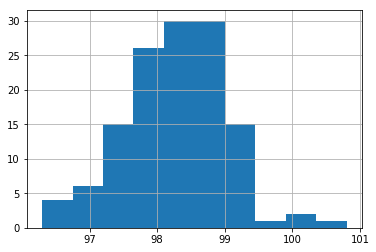

In [7]:
#Q1:Distribution
df['temperature'].hist()

In [8]:
datarows=df.notnull().sum()
datarows

temperature    130
gender         130
heart_rate     130
dtype: int64

In [12]:
pd.crosstab(df.temperature, df.gender, margins=True)

gender,F,M,All
temperature,,,
96.3,0,1,1
96.4,1,0,1
96.7,1,1,2
96.8,1,0,1
96.9,0,1,1
97.0,0,1,1
97.1,0,3,3
97.2,2,1,3
97.3,0,1,1


# Answer 1
Figure above looks like normal distribution with mean around 98.3. The dataframe
consists of 130 rows with no missing data.

# Answer 2
n=130. This is a decent size population to consider normal distribution.

# Answer 2
-I would use a one-sample test since we're comparing to a known standard (98.6F). I'm also assuming the participants are chosen at random and nobody is related to each other.That is, I'm assuming independence between genders and across participants.

In this situation it would be ok to use the z-statistic since n>30 and earlier we saw an approximate normal distribution. So we can approximate population standard deviation with our sample standard deviation and based on the CLT, the distribution approaches a normal distribution.

In [22]:
u,std=mean_std(df.temperature)

In [24]:
u

98.249230769230778

In [27]:
std

0.7331831580389454

In [59]:
critscore=zt_score("z",98.249,98.6,130,0.73318)
critscore

-5.458435503011489

# Question 3

### The mean is 98.2F with std=0.73.  The z-score is -5.46 indicating we are 5.46 standard deviations below the population mean (u=98.6F). Assuming a z-distribution, then the p-value is very extreme (my z-table only goes up to -3.99).  Thus, we can say the p-value <0.0001.  If i assume a t-distribution, we can compare to df=100 where the two-tailed critical t-value is -3.39 corresponding to a p-value of 0.001. Therefore we can conclude the p-value < 0.001 if assuming a t-distribution.

# Question 4: 
If we consider a two-tailed, 95% confidence interval, anyone outside of these boundaries we can interpret as randomly occuring (i.e. not by chance 5% of the time). In order to calculate the confidence interval, we need to calculate the margin of error(1.984*(std/((n)**(.5)))). I've already implemented this in my definition above but will calculate the margin of error here.

In [60]:
std=0.73318
n=130
margError=1.984*(std/((n)**(.5)))
margError

0.1275794134813527

In [48]:
confint=ci_i(95,98.249,130,0.73318)
confint

(98.12142058651864, 98.37657941348135)

### Therefore any temperature below 98.12 and above 98.4 would be considered abnormal temperature. Margin of error is +/- 0.128

# Question 5:
Male vs female

In [63]:
gender= df.groupby(['gender']).agg({'temperature':'sum'})
gender

,temperature
gender,
F,6395.6
M,6376.8


In [79]:
gender_pcts = df.groupby('gender', as_index=False)['temperature'].agg(['mean','count'])
gender_pcts

,mean,count
gender,,
F,98.393846,65
M,98.104615,65


In [17]:
#d=difference in proportions, l=lower limit, u=upper limit, sc=critical z-score
d,l, u,sc=ci_propDiff(95,.983938,.9811046,65,65)
d

0.2833399999999986

In [18]:
l

0.23828794947062

In [19]:
u

0.3283920505293772

In [20]:
sc

12.32677299866415

# the difference is 0.28 (95CI: 0.24, 0.33)F. The difference in temperature between male and female is statistically significant. This can be observed with the 95%CI not containing the value zero, or you can compare the z-score(12.3) to the z-crit=1.98.  That is p-value < 0.0001